In [1]:
"""
Neural network learning using backpropagation and 
gradient descent
"""

import random
import numpy as np
import pickle
import pandas as pd

class PCAN(object):

    def __init__(self, sizes,is_from_file=False):
        """
        sizes is a list containing the number of neurons in each layer  
        from input to output, every layer must be specified
        no need to specify bias neurons
        """
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        if(is_from_file):
            infile = open("weights",'rb')
            self.weights = pickle.load(infile)
            infile.close()

            #print("weights: ",self.weights)
            #print("biases: ",self.biases)

        else:        
            
            a = np.array([np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])])
            #a= np.array([[1,1],[2,2]])
            #print(a[0].shape)
            a = a[0]
            for i in range(a.shape[0]):
                sumrow = 0
                for j in range(a.shape[1]):
                    sumrow += a[i][j]*a[i][j]
                #print(sumrow)
                for j in range(len(a[i])):
                    a[i][j]=a[i][j]/np.math.sqrt(sumrow)

            self.weights = a
            #print(self.weights)

    def train(self,x,eta,num_epoch=10000):
        # w = out*in... x=m*in y=out*1
        e = x.copy()
        epsilon = 0.0005

        # for every neuron
        for j in range(self.weights.shape[0]):
            
            #for every epoch
            for s in range(num_epoch):
                
                #loop for each example
                for k in range(x.shape[0]): 
                    y = np.dot(x[k],self.weights[j].T) # (1*in)(in*1)=y = 1*1
                    # self.weights[k] = 1*in
                    bkup = self.weights[j].copy()
                    self.weights[j] = bkup + eta*np.dot(y,(e[k] - np.dot(y,bkup))) #1*in
                    
                    # break if the change is small
                    """
                    a = self.weights[j] - bkup
                    print(sum(a*a))
                    if(sum(a*a)<epsilon):
                        break
                    """
                #todo decrease epsilon
            
            #update error after stabilization of last set of weights
            for k in range(x.shape[0]): 
                y = np.dot(x[k],self.weights[j].T) # (1*in)(in*1)=y = 1*1
                e[k] = e[k] - y*self.weights[j]



"""
print(nn.weights)
for i in range(nn.weights.shape[0]):
    print(sum(nn.weights[i]*nn.weights[i]))
"""

'\nprint(nn.weights)\nfor i in range(nn.weights.shape[0]):\n    print(sum(nn.weights[i]*nn.weights[i]))\n'

In [22]:
nn = PCAN([2,2])
#print(nn.weights)
x = np.array([[3,3],[4,4],[5,5],[4,3],[2,5],[-1,3],[1.7,9],[3,6]])
nn.train(x,0.0005)
print(nn.weights)

[[-0.47887008 -0.87845444]
 [ 0.87798234 -0.47868712]]


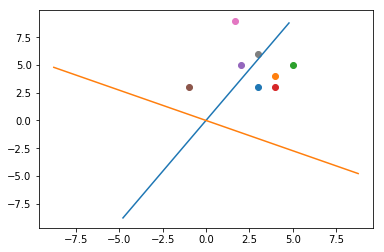

In [23]:
import matplotlib.pyplot as plt

for i in range(x.shape[0]):
    plt.scatter(x[i][0],x[i][1])
for i in range(nn.weights.shape[0]):
    plt.plot([10*nn.weights[i][0],nn.weights[i][0],-10*nn.weights[i][0]],
             [10*nn.weights[i][1],nn.weights[i][1],-10*nn.weights[i][1]])